**Principal Component Analysis**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('pca-unsupervised.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [52]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [53]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [54]:
#applying pca on x to reduce the no of columns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
#since we do not know the % variance explained by the columns
#we use the None as the values for the n_components parameter
x = pca.fit_transform(x)
ev = pca.explained_variance_ratio_
print(ev)

[0.36198848 0.1920749 ]


In [55]:
print(x)

[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]
 [ 3.05025392 -2.12240111]
 [ 2.44908967 -1.17485013]
 [ 2.05943687 -1.60896307]
 [ 2.5108743  -0.91807096]
 [ 2.75362819 -0.78943767]
 [ 3.47973668 -1.30233324]
 [ 1.7547529  -0.61197723]
 [ 2.11346234 -0.67570634]
 [ 3.45815682 -1.13062988]
 [ 4.31278391 -2.09597558]
 [ 2.3051882  -1.66255173]
 [ 2.17195527 -2.32730534]
 [ 1.89897118 -1.63136888]
 [ 3.54198508 -2.51834367]
 [ 2.0845222  -1.06113799]
 [ 3.12440254 -0.78689711]
 [ 1.08657007 -0.24174355]
 [ 2.53522408  0.09184062]
 [ 1.64498834  0.51627893]
 [ 1.76157587  0.31714893]
 [ 0.9900791  -0.94066734]
 [ 1.77527763 -0.68617513]
 [ 1.23542396  0.08980704]
 [ 2.18840633 -0.68956962]
 [ 2.25610898 -0.19146194]
 [ 2.50022003 -1.24083383]
 [ 2.67741105 -1.47187365]
 [ 1.62857912 -0.05270445]
 [ 1.90269086 -1.63306043]
 [ 1.41038853 -0.69793432]
 [ 1.90382623 -0.17671095]
 [ 1.38486223 -0.65863985]
 

In [56]:
#pca done now apply classification or regression based on the problem

In [57]:
#split into train test
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
#import and train SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_tr,y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = classifier.predict(X_te)
acc = accuracy_score(y_te,y_pred)
cm = confusion_matrix(y_te,y_pred)
acc

0.9722222222222222

In [60]:
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

<function matplotlib.pyplot.show>

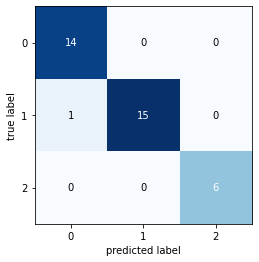

In [61]:
#plotting confusion matrix
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions
plot_confusion_matrix(cm)
plt.show

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


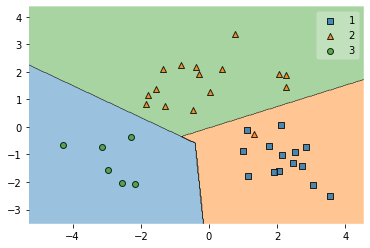

In [62]:
plot_decision_regions(X=X_te,y=y_te,clf=classifier)
plt.show()